# Workshop: Designing Your Own Database & Datapipeline

#### Tuesday May 12, 2020

We're hoping that this session will give you a chance do discuss how you might design your schema and tables in DataJoint. 

We ask that you think about how you might design a database for _your_ data, and come prepared with either **a diagram** that you can share on your screen or a skeleton of a **schema with a few empty tables** in a jupyter notebook (like the code below). There is no need to add/import any actual data - this is just about design!

We'll walk through your ideas and discuss various ways you might build your database.

Here are some considerations to take into account:

1. How much data do you have? What kind of data do you have? For example:
    * Behavioral Data
    * Calcium Data
    * Ephys Data


2. What does your "metadata" look like? How many primary and/or secondary keys might you need for each data type? For example:
    * Animals
    * Equipment
    
    
3. What kind of computation or analysis do you want to be done on your data? For example:
    * Statistics, e.g. calculating means and standard deviations
    * ROI selection, spike sorting, filtering

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import datajoint as dj

Connect to your database (see `hw5_part2.ipynb` if you are having trouble with this)

In [6]:
# connect to the database that you have already set up
# using simple username `root` and password `simple`
connection = dj.conn()

Please enter DataJoint username:  root
Please enter DataJoint password:  ······


Connecting root@localhost:3306


Reminder: The `@schema` decorator tells datajoint which "schema" this table class is assigned to in the MySQL database and it will automatically create the table in the database using the table class, if it does not yet exist in the MySQL database.

In [13]:
schema = dj.schema('workshop')

This was the example used in HW5. The tables can be saved in a separater `.py` file, but for this workshop feel free to define everything in a sinle `.ipynb`

In [23]:
@schema
class FlySubject(dj.Manual):
    definition = """
    # some fly table
    subject_id : int  # id for fly subject
    ---
    age : float # age of fly in days
    sex = 'U': enum('F', 'M', 'U')  # sex of fly
    comments = null : varchar(4000)
    """

@schema
class Stimulus(dj.Manual):
    definition = """
    # stimulus table
    stimulus_name : varchar(31) # short name for stimulus
    ---
    stimulus_type : enum('full-field', 'grating', 'movie')
    duration : float # in seconds
    """
    
@schema
class RecordingSession(dj.Manual):
    definition = """
    # record them sessions
    -> FlySubject
    recording_id : int 
    ---
    -> Stimulus
    experimenter : varchar(127)
    recording_quality : enum('good', 'bad', 'ugly')
    comments = null : varchar(4000)
    """

In [29]:
fly_subject = FlySubject()
fly_stimulus = Stimulus()
recording_session = RecordingSession()

In [30]:
fly_subject

subject_id id for fly subject,age age of fly in days,sex sex of fly,comments


In [31]:
fly_stimulus

stimulus_name short name for stimulus,stimulus_type,duration in seconds


In [32]:
recording_session

subject_id id for fly subject,recording_id,stimulus_name short name for stimulus,experimenter,recording_quality,comments


## Print your ERD! (entity relationship diagram)

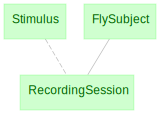

In [33]:
dj.ERD(schema)